# Data Import
This section covers importing data from various sources.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

### Data Loading and Initial Exploration

In this section, we load the S&P 500 index data from a CSV file and display the first and last few rows to understand the dataset's structure.


In [2]:
# import yfinance as yf
# df = yf.download('^SPX', start ='1995-12-27')

df = pd.read_csv('SPX.csv')

In [3]:
    df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1995-12-27,614.299988,615.729980,613.750000,614.530029,614.530029,252300000
1,1995-12-28,614.530029,615.500000,612.400024,614.119995,614.119995,288660000
2,1995-12-29,614.119995,615.929993,612.359985,615.929993,615.929993,321250000
3,1996-01-02,615.929993,620.739990,613.169983,620.729980,620.729980,364180000
4,1996-01-03,620.729980,623.250000,619.559998,621.320007,621.320007,468950000


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
7105,2024-03-20,5181.689941,5226.189941,5171.549805,5224.620117,5224.620117,4064850000
7106,2024-03-21,5253.430176,5261.100098,5240.660156,5241.529785,5241.529785,4207730000
7107,2024-03-22,5242.479980,5246.089844,5229.870117,5234.180176,5234.180176,3374700000
7108,2024-03-25,5219.520020,5229.089844,5216.089844,5218.189941,5218.189941,3331360000
7109,2024-03-26,5228.850098,5235.160156,5203.419922,5203.580078,5203.580078,3871790000


In [5]:
df.shape

(7110, 7)

### Data Cleaning: Handling Missing Values and Duplicates

This section focuses on identifying and addressing any missing or duplicated data entries to ensure the quality and reliability of the dataset for further analysis.


In [6]:
missing_values = df.isnull().sum()
df_duplicated= df.duplicated().sum().any()

# here we drop rows if there is missing values 
df_cleaned = df.dropna()

print("Missing values in each column:\n", missing_values)
print("\n \n duplicated values :  ", df_duplicated)

Missing values in each column:
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

 
 duplicated values :   False


### Column Removal

In this section, we remove columns from the dataset that are not needed for our analysis.

In [7]:

columns_to_drop = ['Adj Close'] 
df = df.drop(columns_to_drop, axis=1)
df

,Date,Open,High,Low,Close,Volume
0,1995-12-27,614.299988,615.729980,613.750000,614.530029,252300000
1,1995-12-28,614.530029,615.500000,612.400024,614.119995,288660000
2,1995-12-29,614.119995,615.929993,612.359985,615.929993,321250000
3,1996-01-02,615.929993,620.739990,613.169983,620.729980,364180000
4,1996-01-03,620.729980,623.250000,619.559998,621.320007,468950000
...,...,...,...,...,...,...
7105,2024-03-20,5181.689941,5226.189941,5171.549805,5224.620117,4064850000
7106,2024-03-21,5253.430176,5261.100098,5240.660156,5241.529785,4207730000
7107,2024-03-22,5242.479980,5246.089844,5229.870117,5234.180176,3374700000
7108,2024-03-25,5219.520020,5229.089844,5216.089844,5218.189941,3331360000




### Visualization of S&P 500 Stock Prices

In this section, we convert the 'Date' column to datetime format for proper indexing and plot the S&P 500 closing and opening prices over time to visualize trends and patterns in the data.


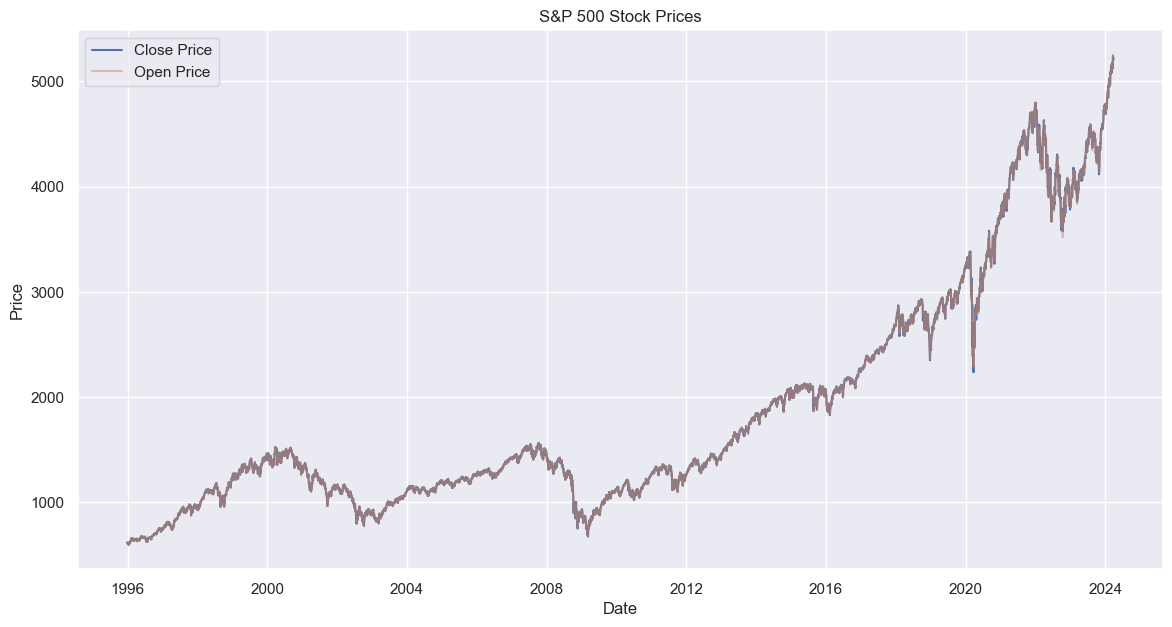

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style='darkgrid')

# Convert 'Date' to datetime 
df['Date'] = pd.to_datetime(df['Date'])

# Plotting the closing prices against the date
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Close Price')

plt.plot(df['Date'], df['Open'], label='Open Price', alpha=0.5)


# Labels and Title
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('S&P 500 Stock Prices')
plt.legend()

# Show plot
plt.show()


In [9]:
from sklearn.preprocessing import MinMaxScaler

# Select the 'Close' column as the data to normalize
data_to_normalize = df['Close'].values.reshape(-1, 1)

# Create the scaler
scaler = MinMaxScaler(feature_range=(0, 1))

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(data_to_normalize)

scaled_data


array([[0.00345679],
       [0.00336848],
       [0.00375831],
       ...,
       [0.99841707],
       [0.99497317],
       [0.99182656]])

In [10]:
# Function to create sequences and their corresponding labels
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# Number of previous time steps to consider for a single prediction
look_back = 30

# Create the dataset with sequences
X, y = create_dataset(scaled_data, look_back)

# Reshape the input data to be suitable for LSTM [samples, time steps, features]
X = np.reshape(X, (X.shape[0], look_back, 1))


In [11]:
# Define the split point, for example, 80% for training
split_percent = 0.80
split = int(split_percent * len(X))

# Split the data
X_train = X[:split]
y_train = y[:split]
X_test = X[split:]
y_test = y[split:]


In [12]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(look_back, 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')


2024-05-14 23:07:33.771450: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-14 23:07:35.594342: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2024-05-14 23:07:35.858451: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 23:07:35.860344: I tensorflow/core/common_runtime/executor.cc:11

In [13]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test), verbose=1)


Epoch 1/5


2024-05-14 23:07:44.856672: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 23:07:44.859174: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 23:07:44.860839: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

177/177 [==============================] - ETA: 0s - loss: 9.5076e-04

2024-05-14 23:07:57.839216: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 23:07:57.841045: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 23:07:57.842503: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

177/177 [==============================] - 15s 65ms/step - loss: 9.5076e-04 - val_loss: 5.1326e-04
Epoch 2/5
177/177 [==============================] - 11s 61ms/step - loss: 4.9596e-05 - val_loss: 5.2608e-04
Epoch 3/5
177/177 [==============================] - 11s 63ms/step - loss: 4.7085e-05 - val_loss: 5.3971e-04
Epoch 4/5
177/177 [==============================] - 13s 74ms/step - loss: 4.4559e-05 - val_loss: 4.2057e-04
Epoch 5/5
177/177 [==============================] - 13s 73ms/step - loss: 4.2036e-05 - val_loss: 5.3673e-04


In [14]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Invert predictions back to original scale
y_train_pred = scaler.inverse_transform(y_train_pred)
y_train = scaler.inverse_transform([y_train])
y_test_pred = scaler.inverse_transform(y_test_pred)
y_test = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train[0], y_train_pred[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test[0], y_test_pred[:,0]))

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')


2024-05-14 23:09:22.448760: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2024-05-14 23:09:22.451010: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2024-05-14 23:09:22.452705: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

45/45 [==============================] - 1s 23ms/step
Train RMSE: 30.03047940285491
Test RMSE: 107.5679299299814


In [15]:

# # Retrieve the original indexes for train and test sets
# train_indexes = original_indexes[:len(y_train)]
# test_indexes = original_indexes[len(y_train):]

# # You can now use train_indexes and test_indexes as they contain the original DataFrame indexes
# print(f'Training data index range: {train_indexes.min()} to {train_indexes.max()}')
# print(f'Testing data index range: {test_indexes.min()} to {test_indexes.max()}')

In [17]:
# # Predict on the training set for visualization purposes
# y_train_pred = model.predict(X_train)

# # Make predictions on the testing data
# y_test_pred = model.predict(X_test)

### Organizing and Inspecting Prediction Results

In this section, we consolidate the predictions with the actual values into structured DataFrames, aligning them with their corresponding dates. This organization is essential for an intuitive inspection of the model's predictive accuracy. It also lays the groundwork for subsequent analysis, such as calculating error metrics and visualizing the results.


In [18]:
look_back = 30  # This should be the same look_back you used earlier in your model

# Ensure the date slices start from the correct index
train_dates = df['Date'][look_back:look_back+len(y_train_pred)].reset_index(drop=True)
test_dates = df['Date'][look_back+len(y_train_pred):look_back+len(y_train_pred)+len(y_test_pred)].reset_index(drop=True)

# Ensure the close price slices start from the correct index and match the length of the predictions
train_actual_close = df['Close'][look_back:look_back+len(y_train_pred)].values
test_actual_close = df['Close'][look_back+len(y_train_pred):look_back+len(y_train_pred)+len(y_test_pred)].values

# Create the DataFrame using the aligned data
train_results = pd.DataFrame({
    'Date': train_dates,
    'Actual_Close': train_actual_close,
    'Predicted_Close': y_train_pred.flatten()  # Assuming y_train_pred is 2D with shape (n_samples, 1)
})

test_results = pd.DataFrame({
    'Date': test_dates,
    'Actual_Close': test_actual_close,
    'Predicted_Close': y_test_pred.flatten()  # Assuming y_test_pred is 2D with shape (n_samples, 1)
})

# Now let's print the first few rows of the DataFrames to inspect
print("Train Results:\n", train_results)
print("\nTest Results:\n", test_results)


Train Results:
            Date  Actual_Close  Predicted_Close
0    1996-02-08    656.070007       632.072449
1    1996-02-09    656.369995       635.212341
2    1996-02-12    661.450012       638.396362
3    1996-02-13    660.510010       641.683594
4    1996-02-14    655.580017       644.856995
...         ...           ...              ...
5658 2018-08-01   2813.360107      2807.353516
5659 2018-08-02   2827.219971      2808.491943
5660 2018-08-03   2840.350098      2809.744873
5661 2018-08-06   2850.399902      2811.623291
5662 2018-08-07   2858.449951      2814.343262

[5663 rows x 3 columns]

Test Results:
            Date  Actual_Close  Predicted_Close
0    2018-08-08   2857.699951      2817.888916
1    2018-08-09   2853.580078      2821.836670
2    2018-08-10   2833.280029      2825.677734
3    2018-08-13   2821.929932      2828.337646
4    2018-08-14   2839.959961      2829.510254
...         ...           ...              ...
1411 2024-03-19   5178.509766      4989.023438
141

### Performance Metrics Evaluation

In this segment, we compute and display the performance metrics for both the training and testing datasets. This evaluation involves Mean Absolute Error (MAE), Mean Squared Error (MSE) and Root Mean Squared Error (RMSE). These metrics help to quantify the accuracy of our model and reveal how well the predictions match up with the actual stock prices.


In [19]:
# from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# import numpy as np


# # Calculate metrics for the training set
# train_mae = mean_absolute_error(train_results['Actual_Close'], train_results['Predicted_Close'])
# train_mse = mean_squared_error(train_results['Actual_Close'], train_results['Predicted_Close'])
# train_rmse = np.sqrt(train_mse)
# train_r2 = r2_score(train_results['Actual_Close'], train_results['Predicted_Close'])

# # Calculate metrics for the testing set
# test_mae = mean_absolute_error(test_results['Actual_Close'], test_results['Predicted_Close'])
# test_mse = mean_squared_error(test_results['Actual_Close'], test_results['Predicted_Close'])
# test_rmse = np.sqrt(test_mse)
# test_r2 = r2_score(test_results['Actual_Close'], test_results['Predicted_Close'])

# # Print out the metrics for the training set
# print("Training set metrics:")
# print(f'Mean Absolute Error (MAE): {train_mae:.2f}')
# print(f'Mean Squared Error (MSE): {train_mse:.2f}')
# print(f'Root Mean Squared Error (RMSE): {train_rmse:.2f}')
# #print(f'R-squared (R2): {train_r2:.2f}')

# # Print out the metrics for the testing set
# print("\nTesting set metrics:")
# print(f'Mean Absolute Error (MAE): {test_mae:.2f}')
# print(f'Mean Squared Error (MSE): {test_mse:.2f}')
# print(f'Root Mean Squared Error (RMSE): {test_rmse:.2f}')
# #print(f'R-squared (R2): {test_r2:.2f}')

from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Function to calculate MAPE
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate metrics for the training set
train_mae = mean_absolute_error(train_results['Actual_Close'], train_results['Predicted_Close'])
train_rmse = np.sqrt(mean_squared_error(train_results['Actual_Close'], train_results['Predicted_Close']))
train_mape = mean_absolute_percentage_error(train_results['Actual_Close'], train_results['Predicted_Close'])

# Calculate metrics for the testing set
test_mae = mean_absolute_error(test_results['Actual_Close'], test_results['Predicted_Close'])
test_rmse = np.sqrt(mean_squared_error(test_results['Actual_Close'], test_results['Predicted_Close']))
test_mape = mean_absolute_percentage_error(test_results['Actual_Close'], test_results['Predicted_Close'])

# Print out the metrics for the training set
print("Training set metrics:")
print(f"Mean Absolute Error (MAE): {train_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {train_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {train_mape:.2f}%")

# Print out the metrics for the testing set
print("\nTesting set metrics:")
print(f"Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {test_rmse:.2f}")
print(f"Mean Absolute Percentage Error (MAPE): {test_mape:.2f}%")


Training set metrics:
Mean Absolute Error (MAE): 23.42
Root Mean Squared Error (RMSE): 30.03
Mean Absolute Percentage Error (MAPE): 1.80%

Testing set metrics:
Mean Absolute Error (MAE): 86.11
Root Mean Squared Error (RMSE): 107.57
Mean Absolute Percentage Error (MAPE): 2.29%


### Visualization of Model Predictions Against Actual Data

In accordance with our project's aim to assess machine learning model efficacy, this visualization plots predicted stock prices from our model against the actual S&P 500 closing prices. The graph provides a visual representation of the model's performance over time, showcasing the alignment of predictions with real-world data. This step is crucial for a comprehensive evaluation, allowing for a clear, intuitive understanding of the model's predictive capabilities in both training and testing phases.


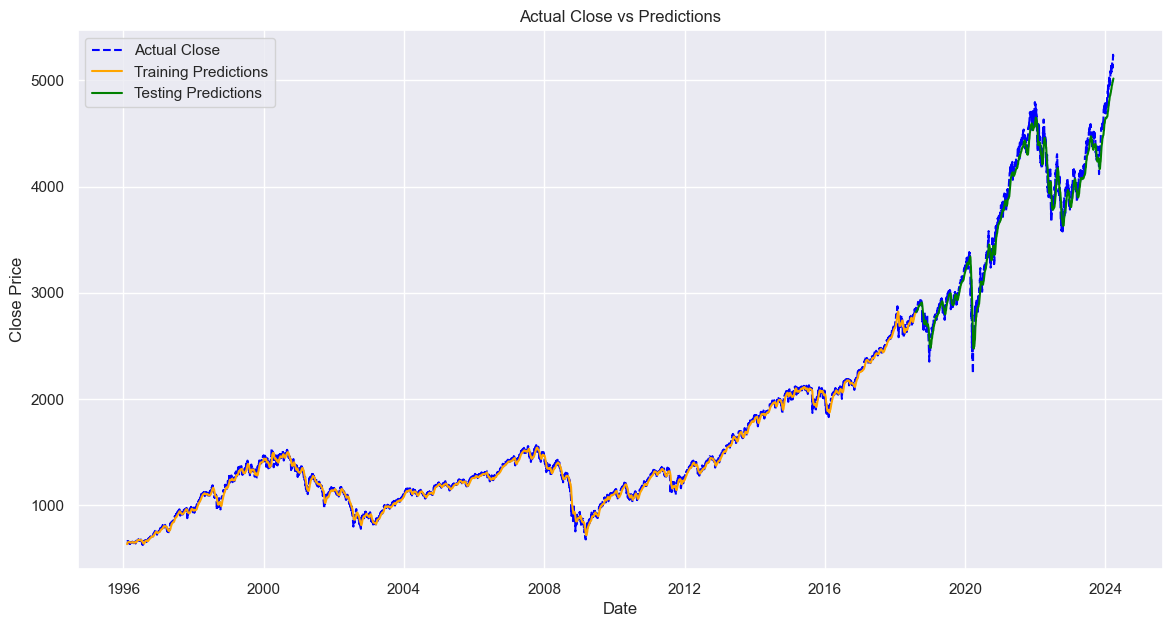

In [20]:

import matplotlib.pyplot as plt
import pandas as pd

# Combine train and test results into a single DataFrame
combined_results = pd.concat([train_results, test_results])

# Convert 'Date' to datetime and sort by date to ensure correct plotting order
combined_results['Date'] = pd.to_datetime(combined_results['Date'])
combined_results.sort_values('Date', inplace=True)

# Set 'Date' as the index for plotting
combined_results.set_index('Date', inplace=True)

# Plot the actual close prices
plt.figure(figsize=(14,7))
plt.plot(combined_results['Actual_Close'], label='Actual Close', color='blue' , linestyle='--')

# Plot the training predictions - we use loc to select the train date range
plt.plot(train_results['Date'], train_results['Predicted_Close'], label='Training Predictions', color='orange')

# Plot the testing predictions - we use loc to select the test date range
plt.plot(test_results['Date'], test_results['Predicted_Close'], label='Testing Predictions', color='green')

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Actual Close vs Predictions')
plt.legend()
plt.show()



1/1 [==============================] - 0s 20ms/step


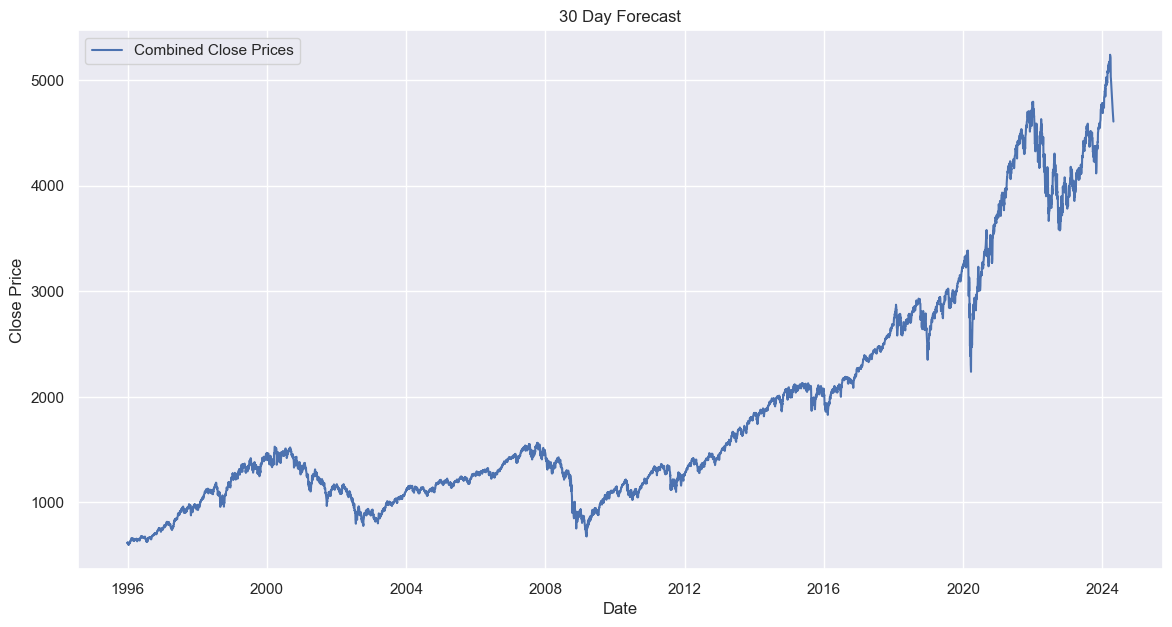

In [21]:
# # Assuming you have a trained model named 'model'

# Prepare input data for prediction: the last `look_back` days from the dataset
last_known_data = scaled_data[-look_back:]  # Or however you've structured your data

# Make predictions for the next 30 days
future_predictions = []
current_batch = last_known_data.reshape((1, look_back, 1))

for i in range(30):  # For each day you want to predict
    future_pred = model.predict(current_batch)[0]
    future_predictions.append(future_pred)
    current_batch = np.append(current_batch[:,1:,:], [[future_pred]], axis=1)

# Invert predictions
future_predictions_inverted = scaler.inverse_transform(future_predictions)

# Create date range for predictions that starts immediately after the last historical date
last_date = df['Date'].iloc[-1]
prediction_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Combine historical and forecasted data for a seamless plot
combined_dates = pd.concat([df['Date'], pd.Series(prediction_dates)])
combined_close_prices = pd.concat([df['Close'], pd.Series(future_predictions_inverted.flatten())])

# Plot the results with combined data
# Plot the results with combined data
plt.figure(figsize=(14,7))
plt.plot(combined_dates, combined_close_prices, label='Combined Close Prices' )
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('30 Day Forecast')
plt.legend()
plt.show()



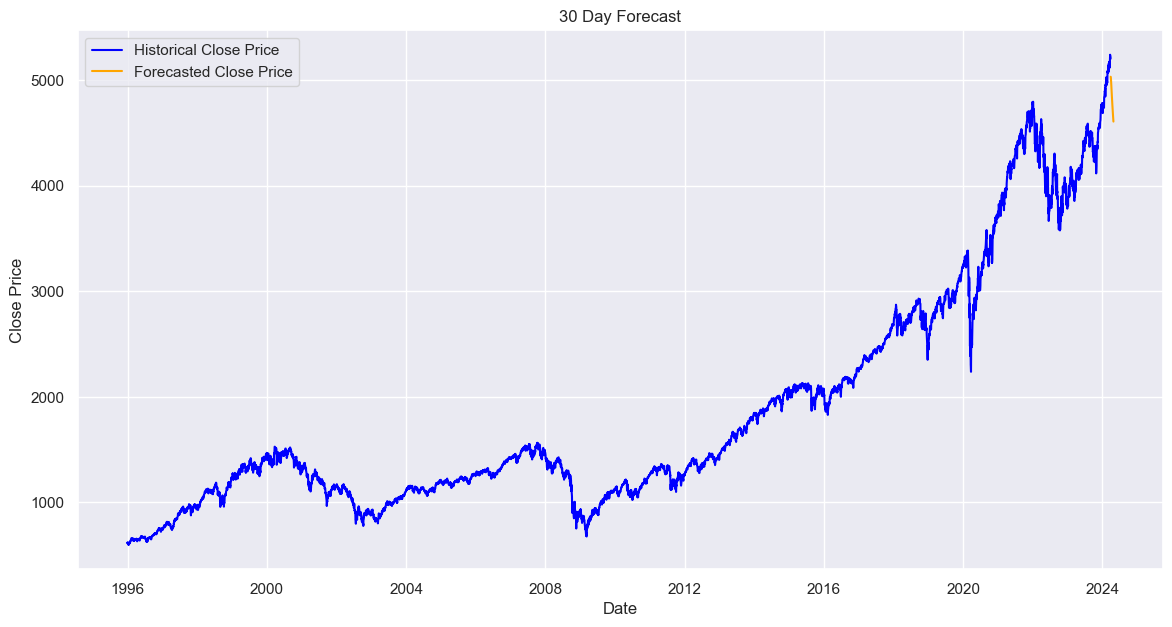

In [22]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `df['Date']` and `df['Close']` are your historical dates and closing prices, respectively
# And `prediction_dates` and `future_predictions_inverted` are your forecasted dates and prices

# First, plot the historical data in blue
plt.figure(figsize=(14,7))
plt.plot(df['Date'], df['Close'], label='Historical Close Price', color='blue')

# Then, add the forecasted data in orange
# Note: Ensure `prediction_dates` and `future_predictions_inverted` are correctly aligned
plt.plot(prediction_dates, future_predictions_inverted.flatten(), label='Forecasted Close Price', color='orange')

# Set the labels and title
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('30 Day Forecast')

# Add a legend to differentiate the historical and forecasted data
plt.legend()

# Show the plot
plt.show()
